<a href="https://colab.research.google.com/github/utarinw/CelebEndorse/blob/main/Celebrity_Endorsement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install Library

In [3]:
# Install Library

! pip install pandas
! pip install sastrawi
! pip install regex
! pip install numpy
! pip install nltk
! pip install matplotlib

# Import Library

In [4]:
# Library Data Cleaning
import csv
import re
import string
import numpy as np 
import pandas as pd

# Library Text Preprocessing (Tokenizing)
from nltk.tokenize import word_tokenize 
from nltk.probability import FreqDist

# Library Text Preprocessing (Stemming)
import Sastrawi 
import nltk
nltk.download('punkt') # library untuk tokenize
nltk.download('stopwords') # Library untuk stopword

# Library Text Preprocessing (Normalisasi)
import swifter
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

# Library labelling
import os

# Library TF-IDF
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Library SVM Model 
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn import metrics

# Library Visual (Matplotlib + Seaborn)
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Data Cleaning

In [5]:
# Import file dataset

df = pd.read_csv("Dataset Crawling.csv")
df.head(5)

,tweets
0,- bukan selebgram
1,"- "" kalau kau lapar, makanlah"" \nmonyet d. luf..."
2,- Pakai akun tuyul/bukan akun asli ngga akan d...
3,-\n-\nBerikut adalah beberapa ekspresi yg. . ....
4,"""Kak temenin aku buat photoshoot yuk""\n""Kak te..."


In [6]:
# Fungsi Cleaning
def cleanTweet(tweet) :

    # menghapus mention (username)
    tweet = re.sub(r'@[\w:]+', '', tweet)
    # menghapus RT
    tweet = re.sub(r'RT[\s]+', '', tweet)
    # menghapus Link
    tweet = re.sub(r'((www\.[^\s]+)|(https?://[^\s]+))', '', tweet)
    # menghapus karakter tdk digunakan
    tweet = re.sub(r'[\n\t#:]+','', tweet)
    # menghapus sticker
    tweet = re.sub(r'\$\w*', '', tweet)
    # menghapus hastags
    tweet = re.sub(r'#\w*', '', tweet)
    # menghapus Punctuation (Tanda Baca)
    tweet = re.sub(r'[^\w\s]',' ', tweet)
    # menghapus kata double
    tweet = re.sub(r'\b\w{1,2}\b', '', tweet)
    # menghilangkan yang bukan huruf
    tweet = re.sub('[^a-zA-Z]', ' ', tweet)
    # menghilangkan digit angka
    tweet = re.sub(r'\d+', '', tweet)
    # menghapus spasi + baris baru
    tweet = re.sub(r'\s\s+', ' ', tweet)
    # menghapus bagian ruang depan yg kosong
    tweet = tweet.lstrip(' ')
    # menghapus karakter di luar Basic Multilingual Plane (BMP)
    tweet = ''.join(c for c in tweet if c <= '\uFFFF')
    return tweet

In [7]:
# membuat kolom baru tweets-clean untuk menyimpan file data clean baru

df['tweets'] = df['tweets'].apply(cleanTweet)
df['tweets-clean'] = df['tweets']

# membuat kolom perbandingan
df = df[['tweets','tweets-clean']]

# Convert file ke csv 
df.to_csv('Data Cleaning.csv', index = False)

df

,tweets,tweets-clean
0,bukan selebgram,bukan selebgram
1,kalau kau lapar makanlah monyet luffy sarangha...,kalau kau lapar makanlah monyet luffy sarangha...
2,Pakai akun tuyul bukan akun asli ngga akan dia...,Pakai akun tuyul bukan akun asli ngga akan dia...
3,Berikut adalah beberapa ekspresi Yaaa anda men...,Berikut adalah beberapa ekspresi Yaaa anda men...
4,Kak temenin aku buat photoshoot yuk Kak temeni...,Kak temenin aku buat photoshoot yuk Kak temeni...
...,...,...
6095,jajannya diumpetin soalnya diendorse yah,jajannya diumpetin soalnya diendorse yah
6096,kita gak diendorse jadi gaboleh sebut merk brand,kita gak diendorse jadi gaboleh sebut merk brand
6097,Wkwkw scrltt endorse dimana pas dicoba masih b...,Wkwkw scrltt endorse dimana pas dicoba masih b...
6098,yaaak udh ada shampoo sendiri shampoo bayik di...,yaaak udh ada shampoo sendiri shampoo bayik di...


# Text Preprocessing

## Case folding

Case Folding untuk mengubah huruf besar menjadi huruf kecil

In [8]:
df['case_folding'] = df['tweets-clean'].str.lower()

# Tampilkan
df[['tweets-clean','case_folding']]

,tweets-clean,case_folding
0,bukan selebgram,bukan selebgram
1,kalau kau lapar makanlah monyet luffy sarangha...,kalau kau lapar makanlah monyet luffy sarangha...
2,Pakai akun tuyul bukan akun asli ngga akan dia...,pakai akun tuyul bukan akun asli ngga akan dia...
3,Berikut adalah beberapa ekspresi Yaaa anda men...,berikut adalah beberapa ekspresi yaaa anda men...
4,Kak temenin aku buat photoshoot yuk Kak temeni...,kak temenin aku buat photoshoot yuk kak temeni...
...,...,...
6095,jajannya diumpetin soalnya diendorse yah,jajannya diumpetin soalnya diendorse yah
6096,kita gak diendorse jadi gaboleh sebut merk brand,kita gak diendorse jadi gaboleh sebut merk brand
6097,Wkwkw scrltt endorse dimana pas dicoba masih b...,wkwkw scrltt endorse dimana pas dicoba masih b...
6098,yaaak udh ada shampoo sendiri shampoo bayik di...,yaaak udh ada shampoo sendiri shampoo bayik di...


In [9]:
# Convert file ke csv 

df[['tweets-clean','case_folding']].to_csv(r'C:\Users\DESKTOP PC\Skripsi\Dataset\Hasil\Text Preprocessing\Case Folding.csv', index = False)

## Tokenize

Tokenize berfungsi untuk memisahkan kalimat menjadi kata per kata

In [10]:
def word_tokenize_wrapper(text):
    return word_tokenize(str(text))

df['tokenizing'] = df['case_folding'].apply(word_tokenize_wrapper)
df[['case_folding', 'tokenizing']]

,case_folding,tokenizing
0,bukan selebgram,"[bukan, selebgram]"
1,kalau kau lapar makanlah monyet luffy sarangha...,"[kalau, kau, lapar, makanlah, monyet, luffy, s..."
2,pakai akun tuyul bukan akun asli ngga akan dia...,"[pakai, akun, tuyul, bukan, akun, asli, ngga, ..."
3,berikut adalah beberapa ekspresi yaaa anda men...,"[berikut, adalah, beberapa, ekspresi, yaaa, an..."
4,kak temenin aku buat photoshoot yuk kak temeni...,"[kak, temenin, aku, buat, photoshoot, yuk, kak..."
...,...,...
6095,jajannya diumpetin soalnya diendorse yah,"[jajannya, diumpetin, soalnya, diendorse, yah]"
6096,kita gak diendorse jadi gaboleh sebut merk brand,"[kita, gak, diendorse, jadi, gaboleh, sebut, m..."
6097,wkwkw scrltt endorse dimana pas dicoba masih b...,"[wkwkw, scrltt, endorse, dimana, pas, dicoba, ..."
6098,yaaak udh ada shampoo sendiri shampoo bayik di...,"[yaaak, udh, ada, shampoo, sendiri, shampoo, b..."


In [11]:
# Convert file ke csv 

df[['case_folding', 'tokenizing']].to_csv(r'C:\Users\DESKTOP PC\Skripsi\Dataset\Hasil\Text Preprocessing\Tokenizing.csv', index = False)

## Normalisasi

Normalisasi merupakan gabungan antara **proses normalisasi** (pengubahan kata menjadi kata yang sesusai KBBI) dengan **proses stopwords** (kata yang memiliki frekuensi terbanyak dan dianggap tidak memiliki makna). kumpulan stopwords yang digunakan berasal dari **kata slang** yang dikumpulan dari github dan beberapa kata yang dilakukan secara manual dengan cara mencari kata yang sesuai dengan PUEBI. 

In [12]:
# Proses Normalisasi


# memanggil kamus slang
kamus_normalisasi = pd.read_csv("Kamus Slang.csv",encoding='utf-8')

kata_normalisasi_dict = {}

for index, row in kamus_normalisasi.iterrows():
    if row[0] not in kata_normalisasi_dict:
        kata_normalisasi_dict[row[0]] = row[1] 
        
def normalisasi_kata(document):
    return [kata_normalisasi_dict[term] if term in kata_normalisasi_dict else term for term in document]

df['Normalisasi'] = df['tokenizing'].apply(normalisasi_kata)
df.loc[25:45,['Normalisasi']]

,Normalisasi
25,"[segera, proyek, gambar, bakat, instruksi, akt..."
26,"[peluang, foto, produk, dari, berbagai, sisi, ..."
27,"[minyfiimin, karena, kita, sudah, melakukan, e..."
28,"[kangen, kalian, pernah, tidak, ton, ikutan, l..."
29,"[kalian, merekomendasi, celebrity, yang, cocok..."
30,"[apa, dia, pikir, kotor, orang, endorse]"
31,"[del, jual, software, selebgram, bisa, untuk, ..."
32,"[pengalaman, ulasan, udah, berpakaian, dua, pr..."
33,"[produk, produk, yang, bantu, saya, melewati, ..."
34,"[merekomendasi, putih, sepatu, sepatu, bintang..."


In [13]:
# Proses Stopwords

list_stopwords = stopwords.words('indonesian')

# Stopword manual
list_stopwords.extend(['','miya','ddd','nya','about','tb','after','beol','ogmt'
                      'come','rewatch','base','nct','boyz','siii','bgtttttt'
                      'gaseh','siii','stakeholders','chairmanship','mantulity'
                      'roasting','independensi','hope','encounter','know','lately', 'alwarabi','always'
                      'about','diluk','live','mean','birthday','tararengkyu','attracted','his','list'
                      'closing','gongmyung','surssicran','huntting','which',
                      'responsibility','attention','grabbing','innersleeve',
                      'surprisingly','gomawo','saranghaeyo','sasageyo','sawarasenai'
                      'hiiragi','seoulstarsnft','ashdkvkal','meng'])

# memanggil kamus stopword
txt_stopword = pd.read_csv(r"ks.txt", names= ["stopwords"], header = None)
list_stopwords.extend(txt_stopword["stopwords"][0].split(' '))

# List Kamus
list_stopwords = set(list_stopwords)

In [14]:
# menghapus stopword pada token
def stopwords_removal(words):
    #kata = [word for word in words if word not in list_stopwords]
    return [word for word in words if word not in list_stopwords]

df['Normalisasi & Stopwords'] = df['Normalisasi'].apply(stopwords_removal)
df.loc[10:20,['Normalisasi & Stopwords']]

,Normalisasi & Stopwords
10,"[jasa, jasa, jasa, bingung, terguna, baju, men..."
11,"[nfts, solananfts, sol, metaverse, metaverse, ..."
12,"[nyata, ulasan, freitag, dibawa, mancing, ayo,..."
13,"[pijat, pijat, jakarta, antipati, murni, ulasa..."
14,"[jaket, sweter, merekomendasi]"
15,"[ulasan, kasih, kakak, netizen, promosi, endorse]"
16,"[uang, influencer, perempuan, suka, gaya, kore..."
17,"[penggemar, pocky, inspirasi, endorse, pocky, ..."
18,"[definisi, minggu, ya, besok, minggu, memburu,..."
19,"[penilaian, bersifat, subjektif, endorse, omon..."


In [15]:
# show result

df[['tokenizing','Normalisasi','Normalisasi & Stopwords']]

,tokenizing,Normalisasi,Normalisasi & Stopwords
0,"[bukan, selebgram]","[bukan, selebgram]",[selebgram]
1,"[kalau, kau, lapar, makanlah, monyet, luffy, s...","[kalau, dia, lapar, makan, monyet, binatang, s...","[lapar, makan, monyet, binatang, larangan, ter..."
2,"[pakai, akun, tuyul, bukan, akun, asli, ngga, ...","[terguna, akun, tuyul, bukan, akun, asli, tida...","[terguna, akun, tuyul, akun, asli, mengganggap..."
3,"[berikut, adalah, beberapa, ekspresi, yaaa, an...","[berikut, adalah, beberapa, ekspresi, ya, anda...","[ekspresi, ya, menilai, terlambat, vaksin, pac..."
4,"[kak, temenin, aku, buat, photoshoot, yuk, kak...","[kakak, temenin, saya, buat, pemotretan, yuk, ...","[kakak, temenin, pemotretan, yuk, kakak, temen..."
...,...,...,...
6095,"[jajannya, diumpetin, soalnya, diendorse, yah]","[jajannya, disembunyikan, soalnya, endorse, se...","[jajannya, disembunyikan, endorse]"
6096,"[kita, gak, diendorse, jadi, gaboleh, sebut, m...","[kita, tidak, endorse, jadi, gaboleh, sebut, m...","[endorse, gaboleh, merek, merek]"
6097,"[wkwkw, scrltt, endorse, dimana, pas, dicoba, ...","[tertawa, scarlet, endorse, dimana, pas, menco...","[tertawa, scarlet, endorse, dimana, pas, menco..."
6098,"[yaaak, udh, ada, shampoo, sendiri, shampoo, b...","[astaga, sudah, ada, shampoo, sendiri, shampoo...","[astaga, shampoo, shampoo, bayi, berguna, inno..."


## Stemming

In [16]:
# buat fungsi stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for document in df['Normalisasi & Stopwords']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '
            
print(len(term_dict))
print("------------------------")

for term in term_dict:
    term_dict[term] = stemmed_wrapper(str(term))
    print(term,":" ,term_dict[term])
    
print(term_dict)
print("------------------------")

Streaming output truncated to the last 5000 lines.
mengeluarkan : keluar
asrama : asrama
yoghurt : yoghurt
idgaf : idgaf
ajukan : aju
ada apa : ada apa
fotokopinya : fotokopi
selera : selera
disematkan : semat
mir : mir
ngepost : ngepost
lembaga : lembaga
pelindung : lindung
verbal : verbal
pengeboman : bom
pelakunya : laku
simpati : simpati
menandakan : tanda
kutulis : tulis
kondangan : kondangan
pemerhati : perhati
gelabakan : gabak
isoman : isoman
put : put
curian : curi
mika : mika
livjun : livjun
kelewat : lewat
livjunkie : livjunkie
keteknya : ketek
iritasi : iritasi
penembak : tembak
kaliv : kaliv
tuli : tuli
deodorant : deodorant
hawa : hawa
bentuk : bentuk
generalisir : generalisir
ultra : ultra
membuka : buka
menyalahkan : salah
dibuktikan : bukti
buruan : buru
benua : benua
cctv : cctv
panggung : panggung
teater : teater
ketinggalan : tinggal
beranjak : anjak
waze : waze
berusaha : usaha
teler : teler
menemani : tani
penyelamat : selamat
harimu : hari
batuk : batuk
terlanjur

In [17]:
# apply stemmed_term ke dataframe

def get_stemmed_term(document):
    return [term_dict[term] for term in document]

df['tweet_tokens_stemmed'] = df['Normalisasi & Stopwords'].swifter.apply(get_stemmed_term)
print(df['tweet_tokens_stemmed'])

Pandas Apply:   0%|          | 0/6100 [00:00<?, ?it/s]

0                                             [selebgram]
1       [lapar, makan, monyet, binatang, larang, tutup...
2       [guna, akun, tuyul, akun, asli, mengganggap, k...
3       [ekspresi, ya, nilai, lambat, vaksin, pacar, s...
4       [kakak, temenin, potret, yuk, kakak, temenin, ...
                              ...                        
6095                           [jajan, sembunyi, endorse]
6096                     [endorse, gaboleh, merek, merek]
6097    [tertawa, scarlet, endorse, mana, pas, coba, b...
6098    [astaga, shampoo, shampoo, bayi, guna, inno, m...
6099    [kayak, maksud, cantik, patut, selebgram, gasi...
Name: tweet_tokens_stemmed, Length: 6100, dtype: object


In [18]:
# Hasil Stemming

df['Stemming'] = df['tweet_tokens_stemmed']
df[['Normalisasi & Stopwords','Stemming']]

,Normalisasi & Stopwords,Stemming
0,[selebgram],[selebgram]
1,"[lapar, makan, monyet, binatang, larangan, ter...","[lapar, makan, monyet, binatang, larang, tutup..."
2,"[terguna, akun, tuyul, akun, asli, mengganggap...","[guna, akun, tuyul, akun, asli, mengganggap, k..."
3,"[ekspresi, ya, menilai, terlambat, vaksin, pac...","[ekspresi, ya, nilai, lambat, vaksin, pacar, s..."
4,"[kakak, temenin, pemotretan, yuk, kakak, temen...","[kakak, temenin, potret, yuk, kakak, temenin, ..."
...,...,...
6095,"[jajannya, disembunyikan, endorse]","[jajan, sembunyi, endorse]"
6096,"[endorse, gaboleh, merek, merek]","[endorse, gaboleh, merek, merek]"
6097,"[tertawa, scarlet, endorse, dimana, pas, menco...","[tertawa, scarlet, endorse, mana, pas, coba, b..."
6098,"[astaga, shampoo, shampoo, bayi, berguna, inno...","[astaga, shampoo, shampoo, bayi, guna, inno, m..."


In [19]:
# convert hasil stemming  ke csv file untuk labelling
df[['Stemming']].to_csv(r'C:\Users\DESKTOP PC\Skripsi\Dataset\Hasil\Labelling\Dasaset Labelling.csv', index=False)

## Hasil Text Preprocessing

In [20]:
# show result

df[['tweets-clean','case_folding','tokenizing','Normalisasi & Stopwords','Stemming']]

,tweets-clean,case_folding,tokenizing,Normalisasi & Stopwords,Stemming
0,bukan selebgram,bukan selebgram,"[bukan, selebgram]",[selebgram],[selebgram]
1,kalau kau lapar makanlah monyet luffy sarangha...,kalau kau lapar makanlah monyet luffy sarangha...,"[kalau, kau, lapar, makanlah, monyet, luffy, s...","[lapar, makan, monyet, binatang, larangan, ter...","[lapar, makan, monyet, binatang, larang, tutup..."
2,Pakai akun tuyul bukan akun asli ngga akan dia...,pakai akun tuyul bukan akun asli ngga akan dia...,"[pakai, akun, tuyul, bukan, akun, asli, ngga, ...","[terguna, akun, tuyul, akun, asli, mengganggap...","[guna, akun, tuyul, akun, asli, mengganggap, k..."
3,Berikut adalah beberapa ekspresi Yaaa anda men...,berikut adalah beberapa ekspresi yaaa anda men...,"[berikut, adalah, beberapa, ekspresi, yaaa, an...","[ekspresi, ya, menilai, terlambat, vaksin, pac...","[ekspresi, ya, nilai, lambat, vaksin, pacar, s..."
4,Kak temenin aku buat photoshoot yuk Kak temeni...,kak temenin aku buat photoshoot yuk kak temeni...,"[kak, temenin, aku, buat, photoshoot, yuk, kak...","[kakak, temenin, pemotretan, yuk, kakak, temen...","[kakak, temenin, potret, yuk, kakak, temenin, ..."
...,...,...,...,...,...
6095,jajannya diumpetin soalnya diendorse yah,jajannya diumpetin soalnya diendorse yah,"[jajannya, diumpetin, soalnya, diendorse, yah]","[jajannya, disembunyikan, endorse]","[jajan, sembunyi, endorse]"
6096,kita gak diendorse jadi gaboleh sebut merk brand,kita gak diendorse jadi gaboleh sebut merk brand,"[kita, gak, diendorse, jadi, gaboleh, sebut, m...","[endorse, gaboleh, merek, merek]","[endorse, gaboleh, merek, merek]"
6097,Wkwkw scrltt endorse dimana pas dicoba masih b...,wkwkw scrltt endorse dimana pas dicoba masih b...,"[wkwkw, scrltt, endorse, dimana, pas, dicoba, ...","[tertawa, scarlet, endorse, dimana, pas, menco...","[tertawa, scarlet, endorse, mana, pas, coba, b..."
6098,yaaak udh ada shampoo sendiri shampoo bayik di...,yaaak udh ada shampoo sendiri shampoo bayik di...,"[yaaak, udh, ada, shampoo, sendiri, shampoo, b...","[astaga, shampoo, shampoo, bayi, berguna, inno...","[astaga, shampoo, shampoo, bayi, guna, inno, m..."


# TF-IDF

## Split Data

membagi data menjadi data latih dan data uji dengan persentasi 70% data latih dan 30% data uji.

In [21]:
# import data label lexicon

df = pd.read_csv('Hasil Labelling.csv')
df.head(5)

,tweet,sentiment
0,['selebgram'],1
1,"['lapar', 'makan', 'monyet', 'binatang', 'lara...",0
2,"['terguna', 'akun', 'tuyul', 'akun', 'asli', '...",1
3,"['ekspresi', 'ya', 'menilai', 'terlambat', 'va...",1
4,"['kakak', 'temenin', 'pemotretan', 'yuk', 'kak...",1


1 = Sentimen Positif
0 = Sentimen Negatif

In [22]:
# pemisalan

x = df.tweet
y = df.sentiment

In [23]:
# split data uji = 30% , data latih = 70%

x_train, x_test, y_train, y_test = model_selection.train_test_split(df['tweet'], df['sentiment'], test_size=0.3, random_state=0)

# Kelas data latih

train_df = pd.DataFrame()
train_df['tweet'] = x_train
train_df['sentiment'] = y_train

# Kelas data Uji

test_df = pd.DataFrame()
test_df['tweet'] = x_test
test_df['sentiment'] = y_test

In [24]:
# tampilkan data latih

train_df

,tweet,sentiment
2738,"['berani', 'sebutkan', 'ranah', 'drama', 'pern...",1
220,"['perpanjangan', 'tangan', 'kepentingan', 'pro...",1
2747,"['gagal', 'duta', 'sate', 'planet', 'bekasi', ...",0
4345,"['selebgram', 'muda', 'pas', 'endorse', 'foto'...",1
3044,"['mempromosikan', 'udah', 'izin', 'hak', 'cipt...",0
...,...,...
4931,"['kepintaran', 'nih', 'bawa', 'sepakbola', 'me...",1
3264,"['anjir', 'memberi ide', 'memasukkan', 'kontak...",1
1653,"['mood', 'endorse', 'melewati']",1
2607,"['berpakaian', 'endorse', 'padil']",1


In [25]:
# Tampilkan data uji

test_df

,tweet,sentiment
2829,"['allah', 'jamal', 'buka', 'endorse', 'kayakny...",1
2670,"['murah', 'totalitas', 'banget', 'endorse', 'b...",1
1850,"['endorse', 'scarlet', 'kakak', 'biar', 'orang...",1
4348,"['kakak', 'kakak', 'mood', 'sebelah', 'parsah'...",1
4054,"['hai', 'pelaut', 'kota', 'samarinda', 'ip', '...",1
...,...,...
345,"['allah', 'menghempaskan', 'manusia', 'terkada...",1
771,"['tolong', 'endorse', 'pencinta', 'krim', 'sej...",1
3302,"['asli', 'suka', 'ngestalk', 'akun', 'fadiljad...",1
4027,"['sukanya', 'belanja', 'baju', 'bayar', 'hutan...",1


In [26]:
# export file csv

train_df.to_csv(r"C:\Users\DESKTOP PC\Skripsi\Dataset\Hasil\TF IDF\Data Latih.csv", index=False)
test_df.to_csv(r"C:\Users\DESKTOP PC\Skripsi\Dataset\Hasil\TF IDF\Data Uji.csv", index=False)

## Perhitungan TF-IDF

In [27]:
tfidf_vect = TfidfVectorizer(use_idf=True)
corpus = df['tweet']
x = tfidf_vect.fit(corpus)
x_train_tfidf = x.transform(x_train)
x_test_tfidf = x.transform(x_test)

In [28]:
print(x_train_tfidf.shape)
print(x_test_tfidf.shape)

(4270, 8380)
(1830, 8380)


In [29]:
print(x_train_tfidf)

  (0, 7820)	0.3433151878309416
  (0, 6867)	0.4647843180468623
  (0, 6477)	0.26021485053937204
  (0, 6129)	0.2962899455352053
  (0, 6123)	0.2551530098192192
  (0, 6067)	0.36196289070608306
  (0, 4843)	0.24690060633932678
  (0, 2879)	0.26021485053937204
  (0, 2804)	0.11433165975006583
  (0, 1928)	0.19960350121039314
  (0, 689)	0.22413975554353877
  (0, 136)	0.23745399974358405
  (0, 123)	0.16211887795619245
  (1, 7537)	0.33265079655758595
  (1, 6347)	0.40919180806559
  (1, 6128)	0.44324139865525786
  (1, 3483)	0.44324139865525786
  (1, 3004)	0.42332366499539414
  (1, 2042)	0.06387895577646577
  (1, 858)	0.3817017035089755
  (2, 6815)	0.6335765331523563
  (2, 6240)	0.3316934203438109
  (2, 5308)	0.2725294649637375
  (2, 2249)	0.2628847886973481
  (2, 2042)	0.04780291144683136
  :	:
  (4265, 7032)	0.5125783519197373
  (4265, 5407)	0.2608912059241066
  (4265, 4955)	0.5552309238529373
  (4265, 3487)	0.4312445636218025
  (4265, 2042)	0.08001863485254862
  (4265, 598)	0.41053986095761874
  (42

In [30]:
# copy data x_train_idf ke data latih

data_latih = x_train_tfidf.copy()
data_latih

<4270x8380 sparse matrix of type '<class 'numpy.float64'>'
	with 34749 stored elements in Compressed Sparse Row format>

In [31]:
print(x_test_tfidf)

  (0, 4970)	0.560894374978485
  (0, 3271)	0.3224640310565236
  (0, 2937)	0.5802654349647527
  (0, 2042)	0.08756125188306778
  (0, 1073)	0.284643060292508
  (0, 158)	0.39499092290003845
  (1, 8071)	0.414100638461036
  (1, 7903)	0.3477661095429748
  (1, 5227)	0.34681983002841416
  (1, 4010)	0.37186643392785096
  (1, 2116)	0.20335124468051174
  (1, 2042)	0.163656881027957
  (1, 932)	0.3388885409712906
  (1, 530)	0.35741483431941096
  (1, 481)	0.37186643392785096
  (2, 7826)	0.5225532282540464
  (2, 6838)	0.5443269471129425
  (2, 5590)	0.35969486878451334
  (2, 3162)	0.33472594085717594
  (2, 2042)	0.11977802013888891
  (2, 907)	0.4181837754707328
  (3, 8005)	0.1461005299087043
  (3, 7940)	0.23586164693956588
  (3, 7871)	0.17441101359510675
  (3, 6921)	0.2741655926845544
  :	:
  (1828, 2709)	0.25054704489391255
  (1828, 2604)	0.118646744058535
  (1828, 2275)	0.2724622580123625
  (1828, 2185)	0.22157670896718948
  (1828, 2042)	0.04111417803801986
  (1828, 651)	0.21761942972067186
  (1828, 6

In [32]:
# copy data x_test_idf ke data test

data_uji = x_test_tfidf.copy()
data_uji

<1830x8380 sparse matrix of type '<class 'numpy.float64'>'
	with 14546 stored elements in Compressed Sparse Row format>

# SVM Classifier

## Inisialisasi Kernel

In [33]:
# Memanggil fungsi Kernel Linear untuk 2 sentiment

SVM = svm.SVC(kernel='linear',C=10)
SVM.fit(x_train_tfidf,y_train)

SVC(C=10, kernel='linear')

## Pemodelan SVM

In [34]:
# ukur parameter data training
SVM.score(x_train_tfidf, y_train)

0.9990632318501171

In [35]:
# ukur parameter data testing
SVM.score(x_test_tfidf, y_test)

0.8912568306010928

In [36]:
# parameter untuk prediksi SVM
predictions_SVM = SVM.predict(x_test_tfidf)

In [37]:
predictions_SVM

array([1, 1, 1, ..., 1, 1, 1])

In [38]:
df_svm = pd.DataFrame(predictions_SVM)

In [39]:
df_svm

,0
0,1
1,1
2,1
3,1
4,1
...,...
1825,1
1826,1
1827,1
1828,1


In [40]:
df_svm.value_counts()

1    1526
0     304
dtype: int64

In [41]:
df_svm.to_csv(r"C:\Users\DESKTOP PC\Skripsi\Dataset\Hasil\SVM\Prediksi.csv", index=False)

## Confusion Matrix

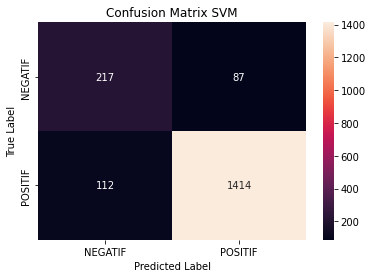

In [42]:
#Confusion Matrix SVM

conf_matrix = confusion_matrix(predictions_SVM,y_test)
class_label = ["NEGATIF", "POSITIF"]
test = pd.DataFrame(conf_matrix, index = class_label, columns = class_label)
sns.heatmap(test, annot = True, fmt = "d")
plt.title("Confusion Matrix SVM")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [43]:
# Tabel Dataframe Confusion Matrix

FP = conf_matrix.sum(axis=0) - np.diag(conf_matrix) 
FN = conf_matrix.sum(axis=1) - np.diag(conf_matrix)
TP = np.diag(conf_matrix)
 
TN = conf_matrix[:].sum() - (FP + FN + TP)
 
kolom = ["Negatif", "Positif"]
label0 = pd.DataFrame(kolom)
label0.columns = ["Sentimen"]
label1 = pd.DataFrame(TP)

label1.columns = ["True Positive"]
label2 = pd.DataFrame(FN)
label2.columns = ["False Negative"]
label3 = pd.DataFrame(FP)
label3.columns = ["False Positive"]
label4 = pd.DataFrame(TN)
label4.columns = ["True Negative"] 
 
result_cm = pd.concat([label0, label1, label2, label3, label4], axis=1)
result_cm

,Sentimen,True Positive,False Negative,False Positive,True Negative
0,Negatif,217,87,112,1414
1,Positif,1414,112,87,217


## Akurasi

In [44]:
print("Accuracy Score =",accuracy_score(predictions_SVM, y_test)*100)

Accuracy Score = 89.12568306010928


In [45]:
print('\n Report Hasil : ') 
print(classification_report(y_test, predictions_SVM))


 Report Hasil : 
              precision    recall  f1-score   support

           0       0.71      0.66      0.69       329
           1       0.93      0.94      0.93      1501

    accuracy                           0.89      1830
   macro avg       0.82      0.80      0.81      1830
weighted avg       0.89      0.89      0.89      1830



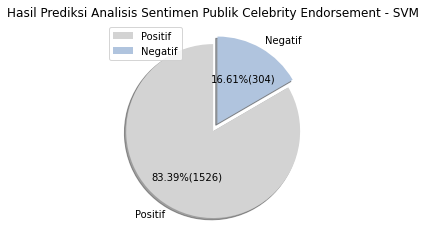

In [47]:
import matplotlib.pyplot as plt

values = [1526,304]
explode = [0, 0.1]
labels = ['Positif', 'Negatif']
colors = ['lightgrey', 'lightsteelblue']

def make_autopct(values):
    def my_autopct(pct):
        total  = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%({v:d})'.format(p=pct,v=val)
    return my_autopct

plt.pie(values, colors=colors, labels=labels, explode=explode,autopct=make_autopct(values), shadow=True, startangle=90)
plt.legend()
plt.title("Hasil Prediksi Analisis Sentimen Publik Celebrity Endorsement - SVM")
plt.show()